# Step0: Install requirements.

In [ ]:
!nvidia-smi

Sat Oct 15 16:55:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
if os.path.isdir("/content/drive/MyDrive/colab/StyleGAN-Human"):
    %cd "/content/drive/MyDrive/colab"
elif os.path.isdir("/content/drive/"):
    #install script
    %cd "/content/drive/MyDrive/colab"
    !git clone https://github.com/mgzzl/StyleGAN-Human    

/content/drive/MyDrive/colab/StyleGAN-Human


In [ ]:
!pip install ninja lpips

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 120 kB 5.1 MB/s 
     |████████████████████████████████| 53 kB 2.7 MB/s 


# Step1: Download pretrained models.

In [ ]:
# %tensorflow_version 1.x 
import os
repo_name='StyleGAN-Human'
os.chdir(f'./{repo_name}')

In [ ]:
def get_download_model_command(file_id, file_name):
    """ Get wget download command for downloading the desired model and save to directory ../pretrained_models. """
    current_directory = os.getcwd()
    save_path = os.path.join(os.path.dirname(current_directory), f'{repo_name}',"pretrained_models")
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    url = r"""wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id={FILE_ID}' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id={FILE_ID}" -O {SAVE_PATH}/{FILE_NAME} && rm -rf /tmp/cookies.txt""".format(FILE_ID=file_id, FILE_NAME=file_name, SAVE_PATH=save_path)
    return url

In [ ]:
MODEL_PATHS = {
    "stylegan1_1024": {"id": "1h-R-IV-INGdPEzj4P9ml6JTEvihuNgLX", "name": "stylegan1_1024.pkl"},
    "stylegan2_1024": {"id": "1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5", "name": "stylegan2_1024.pkl"},
    "stylegan2_512": {"id": "1dlFEHbu-WzQWJl7nBBZYcTyo000H9hVm", "name": "stylegan2_512.pkl"},
    "stylegan3_512": {"id": "1_274jk_N6WSCkKWeu7hjHycqGvbuOFf5", "name": "stylegan3_512.pkl"},
    # "stylegan3_1024": {"id": None, "name": "stylegan3_1024.pkl"},
    # "stylegan1_512": {"id": None, "name": "stylegan1_512.pkl"},
}

In [ ]:
#@title Select which experiment you wish to perform inference on: { run: "auto" }
experiment_type = 'stylegan2_1024' #@param ['stylegan1_1024', 'stylegan2_1024', 'stylegan1_512', 'stylegan2_512', 'stylegan3_512']

In [ ]:
path = MODEL_PATHS[experiment_type]
download_command = get_download_model_command(file_id=path["id"], file_name=path["name"])
!{download_command}

--2022-10-15 16:56:29--  https://docs.google.com/uc?export=download&confirm=t&id=1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5
Resolving docs.google.com (docs.google.com)... 173.194.193.100, 173.194.193.102, 173.194.193.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.193.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6j2ncl5fvnddkmothquvil0h6e30cpnm/1665852975000/01844016854614948534/*/1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5?e=download&uuid=a75bc2c3-bb04-4a7e-aff2-8fed12650127 [following]
--2022-10-15 16:56:30--  https://doc-10-10-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/6j2ncl5fvnddkmothquvil0h6e30cpnm/1665852975000/01844016854614948534/*/1FlAb1rYa0r_--Zj_ML8e6shmaF28hQb5?e=download&uuid=a75bc2c3-bb04-4a7e-aff2-8fed12650127
Resolving doc-10-10-docs.googleusercontent.com (doc-10-10-docs.googleusercontent.com)... 142.250.1.13

# Step2: Generate full-body images using different models.


In [ ]:
version=experiment_type.split("_")[0][-1]

In [ ]:
!python generate.py --outdir=outputs/{experiment_type}/ --seeds=25-90 --trunc=0.7 --network=pretrained_models/{experiment_type}.pkl --version {version}

Loading networks from "pretrained_models/stylegan2_1024.pkl"...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.


# Step3: Visualize

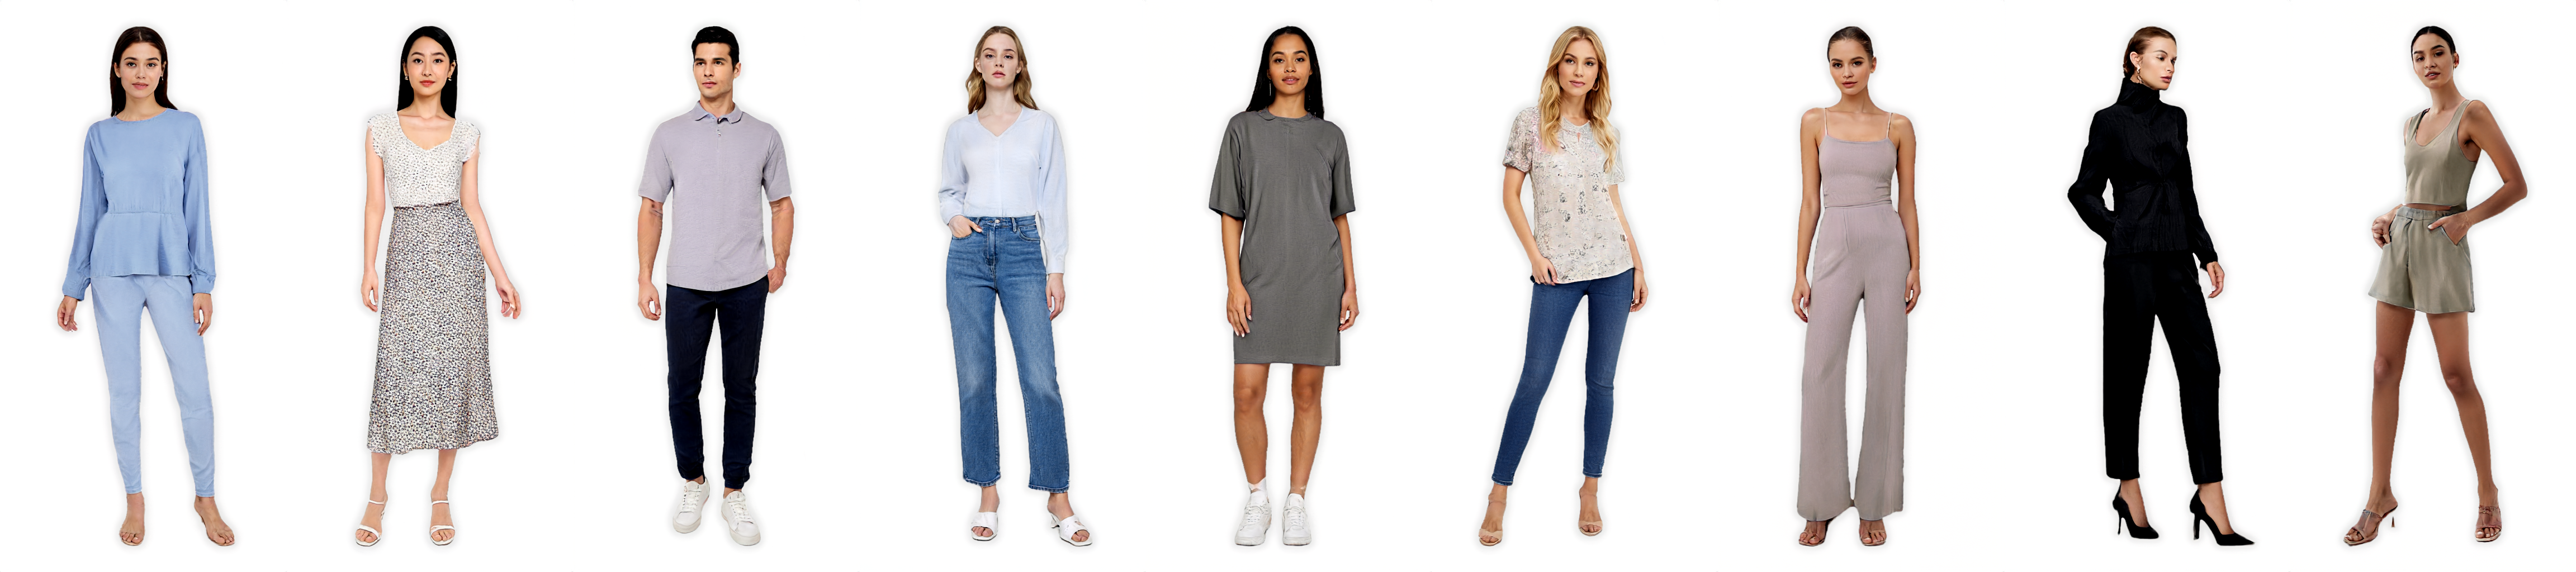

In [ ]:
from PIL import Image
import cv2
import numpy as np
output_images = [os.path.join(f"outputs/{experiment_type}", x) for x in os.listdir(f"outputs/{experiment_type}")]
sample_images = output_images[:9]
for idx, image_path in enumerate(sample_images):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    if idx == 0:
        res = image
    else:
        res = np.concatenate([res, image], axis=1)

res = Image.fromarray(res)
res

In [ ]:
test

# Application 1: Editing & Style-mixing:

In [ ]:
# editing
#'upper_length' or 'bottom_length'
!python edit.py --outdir outputs/editing --network pretrained_models/stylegan2_1024.pkl --attr_name upper_length --seeds 61531,61570,61571,61610 

start...


In [ ]:
# style-mixing
!python style_mixing.py --outdir=outputs/stylemixing --rows=85,100,75,458,1500 --cols=55,821,1789,293 --network=pretrained_models/stylegan2_1024.pkl --styles=0-3

Loading networks from "pretrained_models/stylegan2_1024.pkl"...
Generating W vectors...
Setting up PyTorch plugin "bias_act_plugin"... Done.
Generating images...
Setting up PyTorch plugin "upfirdn2d_plugin"... Done.
Generating style-mixed images...
Saving image grid...


# Application 2: InsetGAN (use StyleGAN2-FFHQ as face generator):

In [ ]:
## Download pretrained StyleGAN on FFHQ 1024x1024 and dlib dat.
ffhq_ckpt = get_download_model_command(file_id="125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M", file_name='ffhq.pkl')
dlib_detector = get_download_model_command(file_id="1MduBgju5KFNrQfDLoQXJ_1_h5MnctCIG", file_name='mmod_human_face_detector.dat')
dlib_landmark = get_download_model_command(file_id="1A82DnJBJzt8wI2J8ZrCK5fgHcQ2-tcWM", file_name='shape_predictor_68_face_landmarks.dat')
!{ffhq_ckpt}
!{dlib_detector}
!{dlib_landmark}

--2022-08-19 04:11:27--  https://docs.google.com/uc?export=download&confirm=t&id=125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M
Resolving docs.google.com (docs.google.com)... 172.253.117.139, 172.253.117.113, 172.253.117.100, ...
Connecting to docs.google.com (docs.google.com)|172.253.117.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-00-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uktu440pe42i9h1tqva2a9nsr03nugge/1660882275000/12249705648077311963/*/125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M?e=download&uuid=0240c7cf-abea-4bd7-8094-086a80678498 [following]
--2022-08-19 04:11:27--  https://doc-00-as-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/uktu440pe42i9h1tqva2a9nsr03nugge/1660882275000/12249705648077311963/*/125OG7SMkXI-Kf2aqiwLLHyCvSW-gZk3M?e=download&uuid=0240c7cf-abea-4bd7-8094-086a80678498
Resolving doc-00-as-docs.googleusercontent.com (doc-00-as-docs.googleusercontent.com)... 74.125.142.1

In [ ]:
!pip uninstall dlib -y

Found existing installation: dlib 19.24.0
Uninstalling dlib-19.24.0:
  Successfully uninstalled dlib-19.24.0


In [ ]:
 !pip install -v --install-option="--no" --install-option="DLIB_USE_CUDA" dlib

/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py:232: UserWarning: Disabling all use of wheels due to the use of --build-option / --global-option / --install-option.
  cmdoptions.check_install_build_global(options)
Using pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
Value for scheme.platlib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.purelib does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/lib/python3.7/dist-packages
sysconfig: /usr/lib/python3.7/site-packages
Value for scheme.headers does not match. Please report this to <https://github.com/pypa/pip/issues/9617>
distutils: /usr/local/include/python3.7/UNKNOWN
sysconfig: /usr/include/python3.7m/UNKNOWN
Value for scheme.scripts does not match. Please report this to <https://github.com/pypa/p

In [ ]:
# Perform joint optimization and generate seamless images
!python insetgan.py --face_seed=9 --body_seed=89180 \
                    --joint_steps=500 --outdir outputs/insetgan --video 1

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Loading model from: /usr/local/lib/python3.7/dist-packages/lpips/weights/v0.1/alex.pth
tcmalloc: large alloc 1722540032 bytes == 0xff1fc000 @  0x7f9df882e887 0x7f9d5f7d9324 0x7f9d5f7df91c 0x7f9d5f7e238a 0x7f9d5f6d587f 0x7f9d5f6f3cf1 0x7f9d5f